Mean Squared Error: 0.5792479269706824
R^2 Score: 0.557964012312959


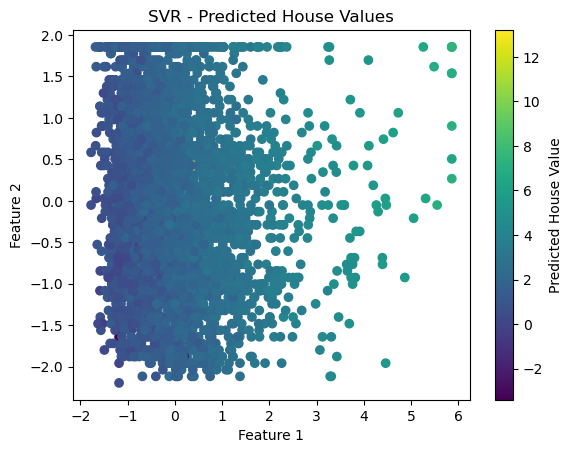

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

#--------------------------------------------------------------------------------------------------------------
# 1 导入数据集
# 使用fetch_california_housing函数加载加利福尼亚州房屋数据集
#--------------------------------------------------------------------------------------------------------------
data = fetch_california_housing(as_frame=True)
X = data['data']
y = data['target']
#--------------------------------------------------------------------------------------------------------------
# 2 数据预处理
# 对特征进行标准化，并将数据集划分为训练集和测试集
#--------------------------------------------------------------------------------------------------------------
scaler = StandardScaler() # 归一化
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#--------------------------------------------------------------------------------------------------------------
# 3 训练SVR模型
# 使用OneVsRestClassifier和SVC类来训练和预测多类别支持向量机模型
#--------------------------------------------------------------------------------------------------------------
model = SVR(C=1.0, kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#--------------------------------------------------------------------------------------------------------------
# 4 评估模型性能
# 使用classification_report和confusion_matrix函数评估模型性能，并使用scatter函数可视化分类结果
#--------------------------------------------------------------------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
#--------------------------------------------------------------------------------------------------------------
# 5 可视化预测结果
#--------------------------------------------------------------------------------------------------------------
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.colorbar(label='Predicted House Value')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVR - Predicted House Values')
plt.show()


SVC方法经扩展甚至可以用来解决回归问题，这种方法称作支持向量回归（即SVR).
SVC生成的模型实际上没有使用全部训练集数据，而只是使用其中一部分，也就是离决策边界最近的数据点。
类似地，SVR生成的模型也只依赖于部分训练数据。我们将介绍SVR算法是如何使用diabetes数据集的，我们将只考虑第三个生理因素。
我们使用是那种不同的回归算法：线性和两个非线性（多项式）。
使用线性内核的SVR算法将生成一条直线作为线性预测模型，非常类似于前面见过的线性回归算法，而使用多项式内核的SVR算法生成二次和三次曲线。
SVR( )函数几乎与前面见过的SVC( )函数完全相同。唯一需要考虑的就是测试集数据必须按生序形式排列。

以下是关于 `svm.SVR` 的参数详解：

- `C`：正则化系数，用于防止模型过拟合。C值越大，对模型的惩罚越高，泛化能力越弱（过拟合）；反之，C值越小，对模型的惩罚越低，泛化能力越强（欠拟合）。
- `kernel`：核函数，用于选择映射到高维线性可分的核函数。常用的核函数有：`linear`（线性核函数）、`poly`（多项式核函数）、`rbf`（径向基函数）和`sigmoid`（Logistic函数）。
- `degree`：多项式核函数的维度，只有在使用多项式核函数的时候才有用，使用其他核函数自动忽略此参数。
- `gamma`：核函数的系数，只作用于`rbf`、`poly`和`sigmoid`三个核函数。
- `epsilon`：用来定义模型对于错误分类的容忍度，即错误分类而不受到惩罚。
- `shrinking`：是否采用启发式收缩，当迭代次数过大时，启用启发式收缩可以缩短训练时间，然而如果我们对停止迭代容忍度较高时（tol参数来反映），不用启发式收缩可能会更快一些。
- `tol`：定义模型停止拟合的误差值。
- `cache_size`：指定模型在训练时，能占用的最大RAM空间。
- `max_iter`：硬性设置最大迭代次数，不管模型是否拟合完成，即不关心误差值（tol参数）。


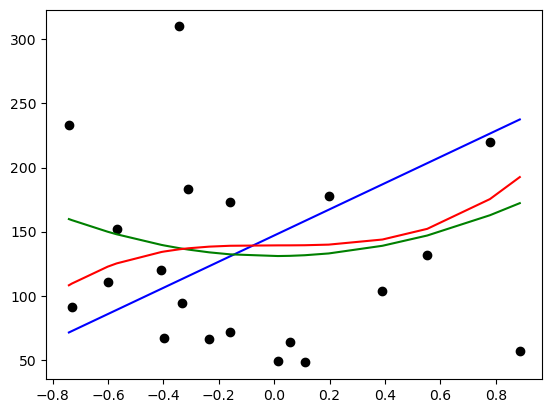

In [3]:
# example2

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

x0_test = x_test[:, 2]
x0_train = x_train[:, 2]

x0_test = x0_test[:, np.newaxis]
x0_train = x0_train[:, np.newaxis]

x0_test.sort(axis=0)
x0_test = x0_test*10

x0_train = x0_train*10

svr = svm.SVR(kernel='linear',C=10,gamma=1)
svr2 = svm.SVR(kernel='poly',C=10,degree=2,gamma=1)
svr3 = svm.SVR(kernel='poly',C=10,degree=3,gamma=1)

svr.fit(x0_train, y_train)
svr2.fit(x0_train, y_train)
svr3.fit(x0_train, y_train)

y = svr.predict(x0_test)
y2 = svr2.predict(x0_test)
y3 = svr3.predict(x0_test)

plt.scatter(x0_test, y_test, color='k')
plt.plot(x0_test, y, color='b')
plt.plot(x0_test,y2, color='g')
plt.plot(x0_test, y3, color='r')
plt.show()





三种回归曲线分别用三种颜色来表示。线性回归使用蓝色；二次曲线使用绿色表示，三次曲线使用红色表示。